In [1]:
# import necessary libraries

# for data analysis
import pandas as pd
import numpy as np

# for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# classifier libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

!pip install xgboost
from xgboost import XGBClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

# Evaluation metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings("ignore")

In [2]:
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier

In [3]:
# import data
df = pd.read_csv(r"C:\Users\hp\Desktop\loan_train.csv")

In [4]:
df.shape

(614, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
# statistical description of numerical features
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [7]:
# statistical description of categorical features

df.describe(include=['bool','object'])

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP001002,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


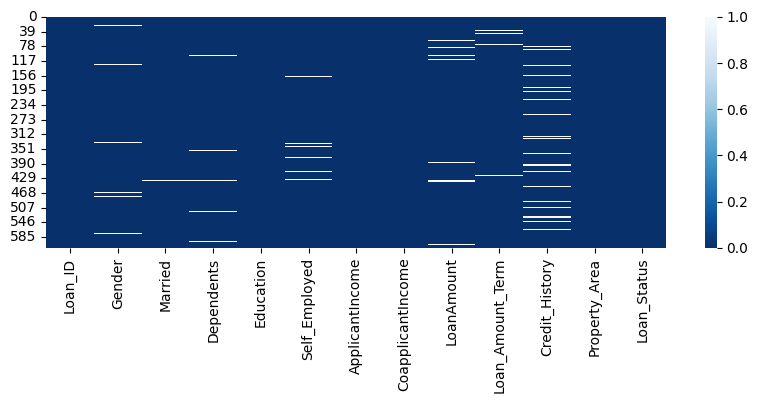

In [8]:
# check for missing values
print(df.isnull().sum())

plt.figure(figsize=(10,3))
sns.heatmap(df.isnull(), cbar=True, cmap="Blues_r");

In [9]:
# drop missing values
data = df.dropna()

In [10]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [11]:
# check for duplicates
data.duplicated().sum()

0

#### no duplicate values in the dataset

#### Exploratory Data Analysis

- Univariate Analysis

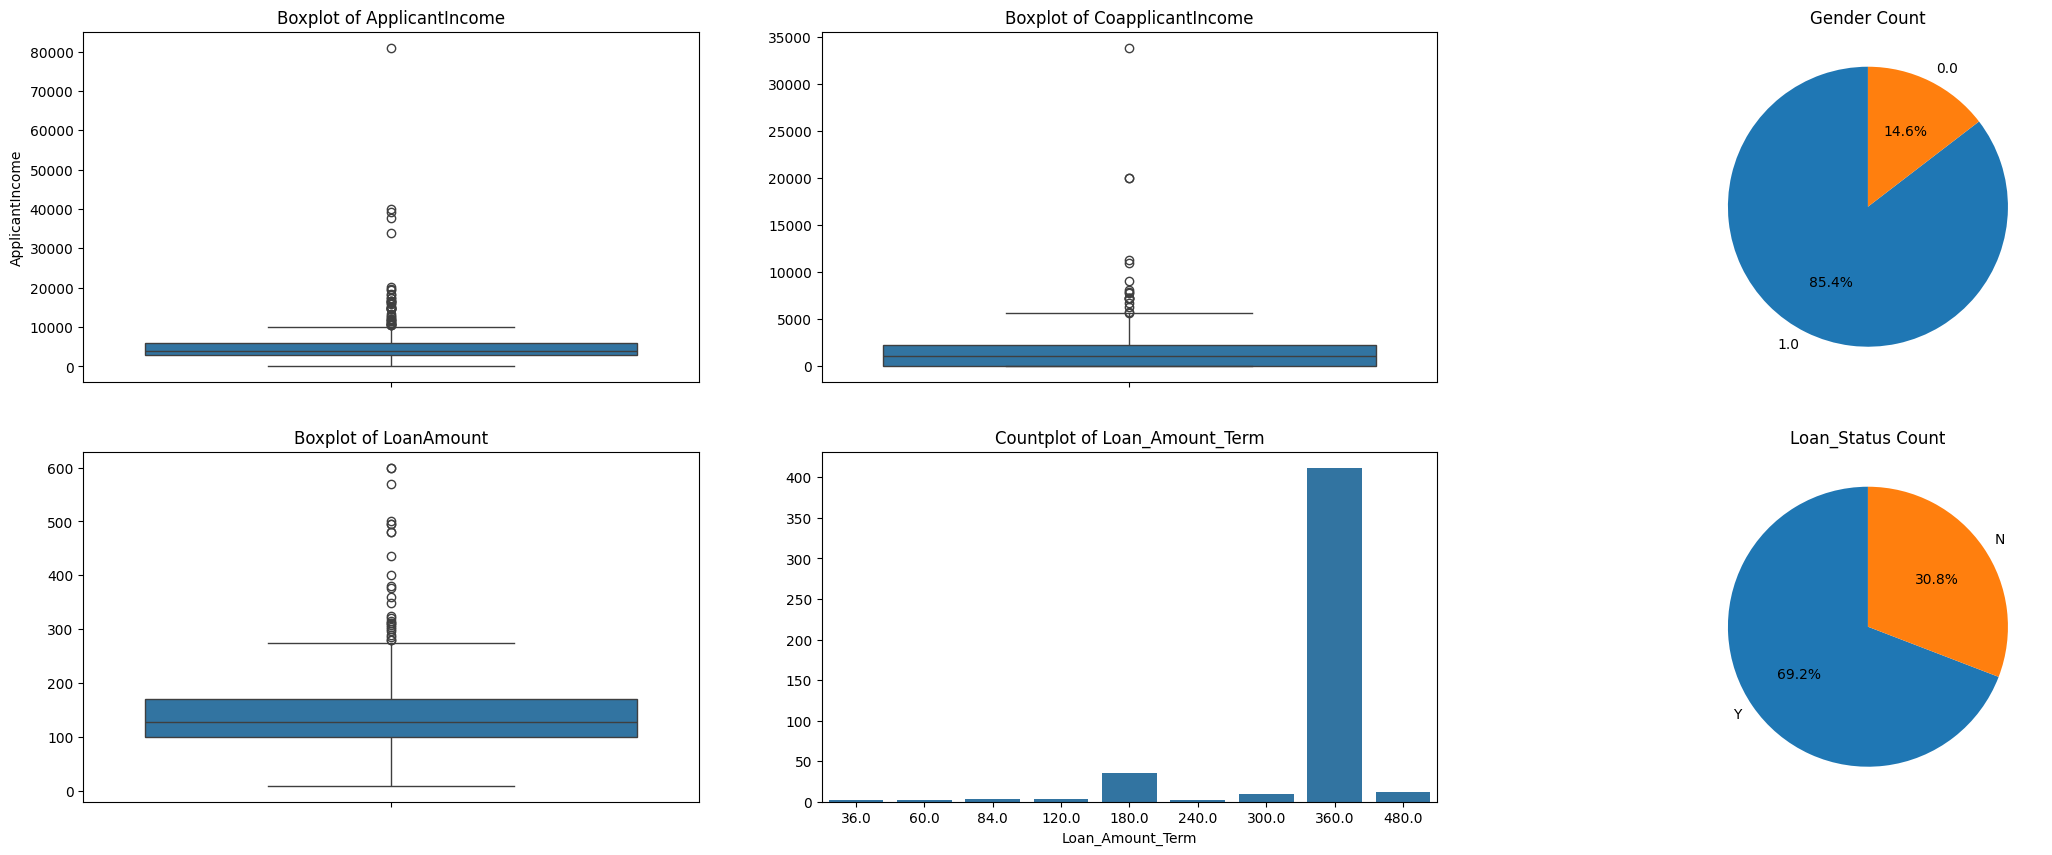

In [31]:
# numerical features

fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(27,10))

sns.boxplot(y='ApplicantIncome', data=data, ax=axs[0,0])
axs[0,0].set_title('Boxplot of ApplicantIncome')
axs[0,0].set_xlabel('')

sns.boxplot(y='CoapplicantIncome', data=data, ax=axs[0,1])
axs[0,1].set_title('Boxplot of CoapplicantIncome')
axs[0,1].set_xlabel('')
axs[0,1].set_ylabel('')
  
cred_count = data['Credit_History'].value_counts(ascending=False)
axs[0,2].pie(cred_count, labels=cred_count.index, autopct='%1.1f%%', startangle=90)
axs[0,2].set_title('Gender Count')

sns.boxplot(y='LoanAmount', data=data, ax=axs[1,0])
axs[1,0].set_title('Boxplot of LoanAmount')
axs[1,0].set_ylabel('')

sns.countplot(x='Loan_Amount_Term', data=data, ax=axs[1,1])
axs[1,1].set_title('Countplot of Loan_Amount_Term')
axs[1,1].set_ylabel('')

stat_count = data['Loan_Status'].value_counts(ascending=False)
axs[1,2].pie(stat_count, labels=stat_count.index, autopct='%1.1f%%', startangle=90)
axs[1,2].set_title('Loan_Status Count')

plt.show();

#### Observation
- 85.4% of applicants are male while 14.6% of applicants are female
- 69.2% of the applicants loan status are still active while 30.8% have inactive loan status
- 360 days have the highest loan amount term count
- Most of the applicant income falls within a range of 2877 - 5795, with a median value of 3812. There are some outliers with amount as high as 81000.
- Most of the loan amount falls within a range of 100 - 200, with a median value of 128. There are some outliers with amount as high as 700.
- The co applicant income falls within a range of 1188 - 2297. There are some outliers with amount as high as 41667.

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 480 entries, 1 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            480 non-null    object 
 1   Gender             480 non-null    object 
 2   Married            480 non-null    object 
 3   Dependents         480 non-null    object 
 4   Education          480 non-null    object 
 5   Self_Employed      480 non-null    object 
 6   ApplicantIncome    480 non-null    int64  
 7   CoapplicantIncome  480 non-null    float64
 8   LoanAmount         480 non-null    float64
 9   Loan_Amount_Term   480 non-null    float64
 10  Credit_History     480 non-null    float64
 11  Property_Area      480 non-null    object 
 12  Loan_Status        480 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 52.5+ KB


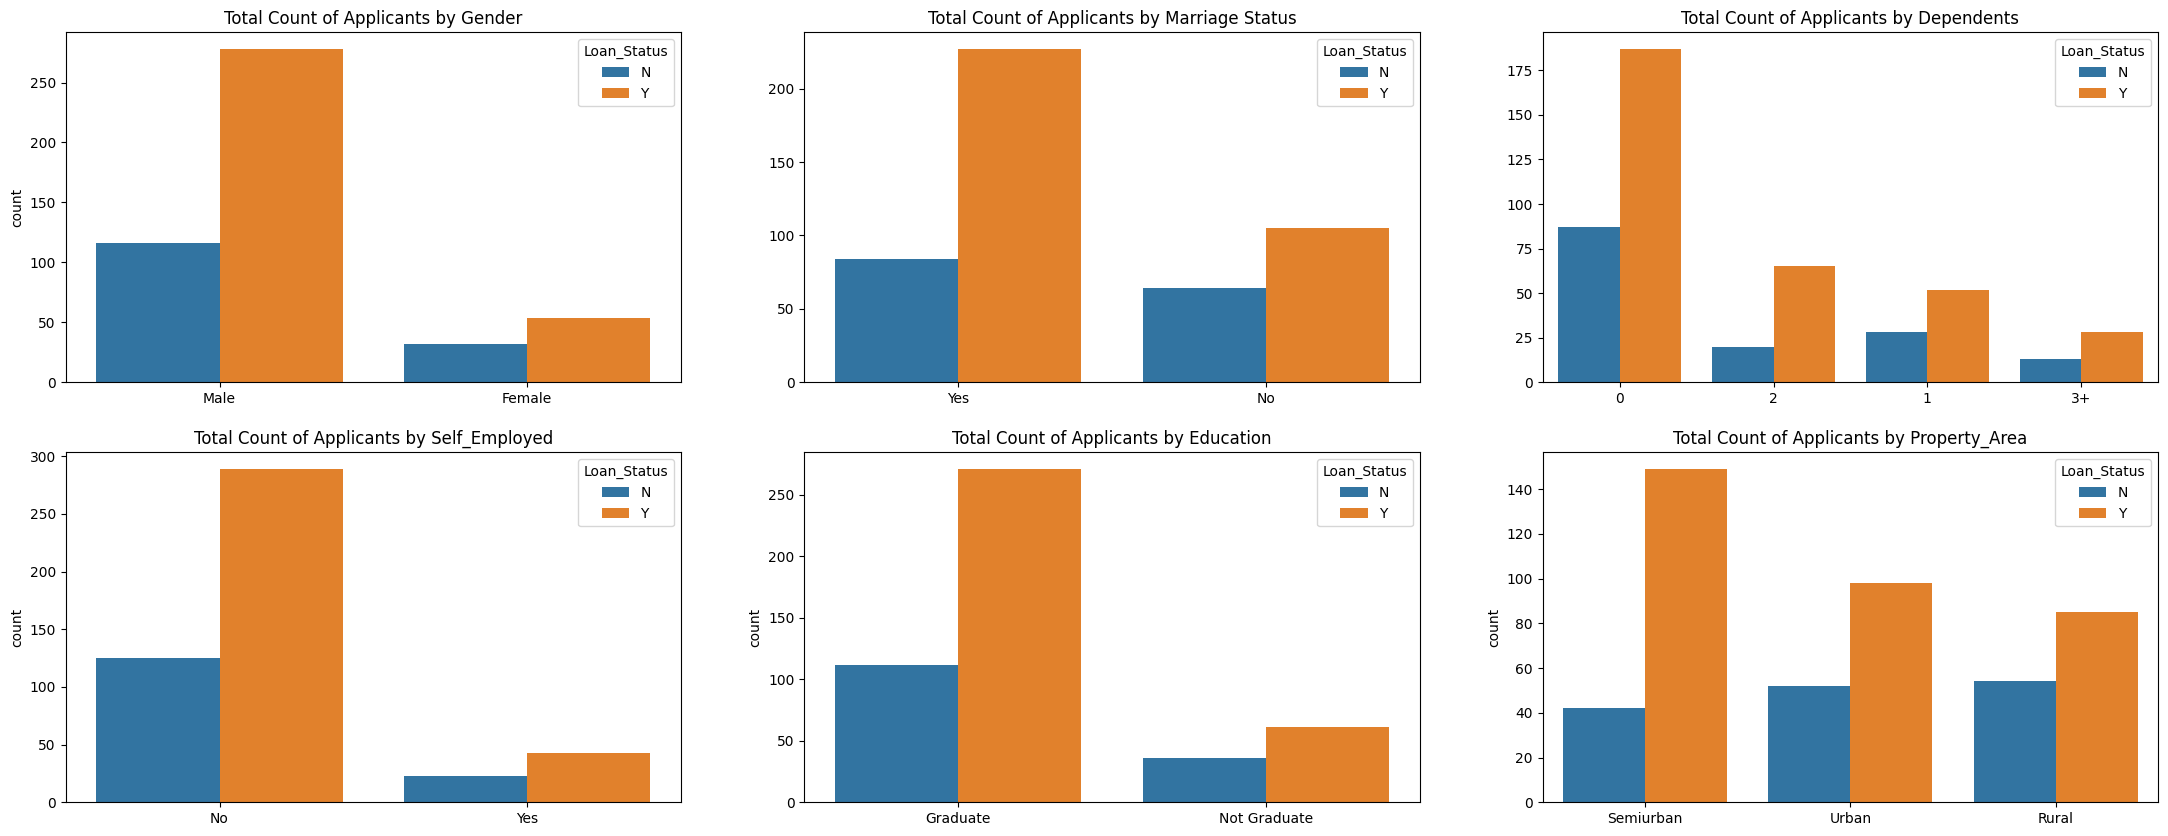

In [14]:
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(27,10))

sns.countplot(x='Gender', data=data, hue='Loan_Status', order=data['Gender'].value_counts(ascending=False).index, ax=axs[0,0])
axs[0,0].set_title('Total Count of Applicants by Gender')
axs[0,0].set_xlabel('')

sns.countplot(x='Married', data=data, hue='Loan_Status', order=data['Married'].value_counts(ascending=False).index, ax=axs[0,1])
axs[0,1].set_title('Total Count of Applicants by Marriage Status')
axs[0,1].set_xlabel('')
axs[0,1].set_ylabel('')

sns.countplot(x='Dependents', data=data, hue='Loan_Status', order=data['Dependents'].value_counts(ascending=False).index, ax=axs[0,2])
axs[0,2].set_title('Total Count of Applicants by Dependents')
axs[0,2].set_xlabel('')
axs[0,2].set_ylabel('')

sns.countplot(x='Self_Employed', data=data, hue='Loan_Status', order=data['Self_Employed'].value_counts(ascending=False).index, ax=axs[1,0])
axs[1,0].set_title('Total Count of Applicants by Self_Employed')
axs[1,0].set_xlabel('')

sns.countplot(x='Education', data=data, hue='Loan_Status', order=data['Education'].value_counts(ascending=False).index, ax=axs[1,1])
axs[1,1].set_title('Total Count of Applicants by Education')
axs[1,1].set_xlabel('')

sns.countplot(x='Property_Area', data=data, hue='Loan_Status', order=data['Property_Area'].value_counts(ascending=False).index, ax=axs[1,2])
axs[1,2].set_title('Total Count of Applicants by Property_Area')
axs[1,2].set_xlabel('')

plt.show();

### Observations
- Applicants with a higher perentage of active loan status are married, male, have 0 dependents, are not self-employed, are graduates and they live in semi-urban areas.

In [15]:
# drop redundant features - unique identifiers
data.drop(['Loan_ID'],axis=1, inplace=True)

In [16]:
# encoding features
# convert categorial columns to numerical columns

from sklearn.preprocessing import LabelEncoder

#label encoding
encoder = LabelEncoder()  # method initialize

# looping through the columns in the dataset
df1 = data.copy()
for c in df1.columns[:]:
    if(df1[c].dtype == 'object'):
        df1[c] = encoder.fit_transform(df1[c])
    else:
        df1[c] = df1[c]

In [17]:
df1.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
5,1,1,2,0,1,5417,4196.0,267.0,360.0,1.0,2,1


In [18]:
#segment dataset into data and target label
target = df1.pop('Loan_Status')

In [19]:
# scale dataset features
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df1),columns=df1.columns)
df_scaled.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1.0,1.0,0.333333,0.0,0.0,0.054830,0.044567,0.201354,0.72973,1.0,0.0
1,1.0,1.0,0.000000,0.0,1.0,0.035250,0.000000,0.096447,0.72973,1.0,1.0
2,1.0,1.0,0.000000,1.0,0.0,0.030093,0.069687,0.187817,0.72973,1.0,1.0
3,1.0,0.0,0.000000,0.0,0.0,0.072356,0.000000,0.223350,0.72973,1.0,1.0
4,1.0,1.0,0.666667,0.0,1.0,0.065145,0.124006,0.436548,0.72973,1.0,1.0


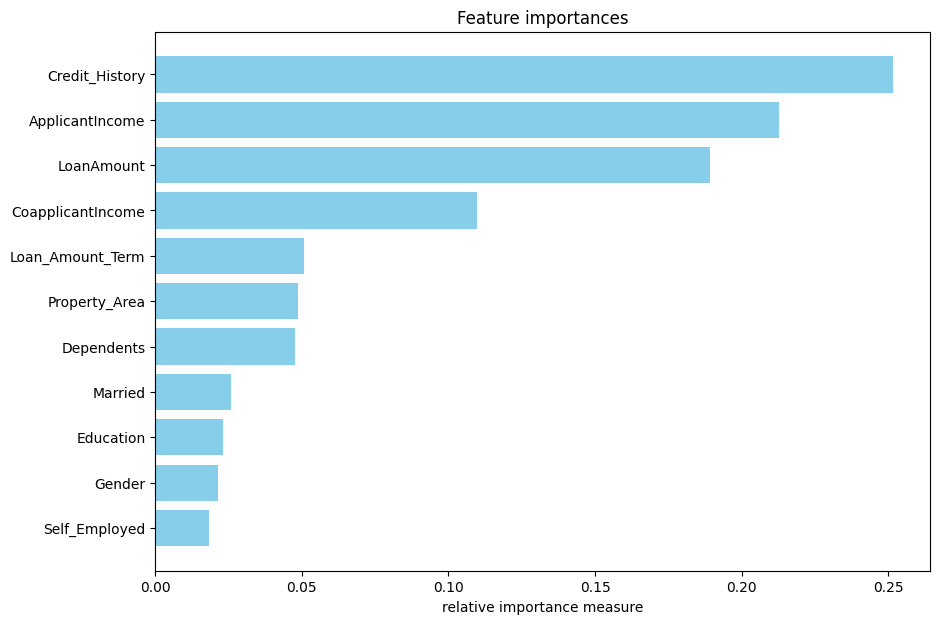

In [20]:
#identifying key featurs from the data set
model = RandomForestClassifier()

# using a random classifier model to identify the importance features
# fit the model
model.fit(df_scaled,target)
importances = model.feature_importances_
sort_imp = np.argsort(importances)
names = list(df_scaled.columns)

#plot feature importance chart
plt.figure(figsize=(10,7))
plt.barh(range(len(sort_imp)),importances[sort_imp], color="skyblue")
plt.yticks(range(len(sort_imp)),[names[x] for x in sort_imp])
plt.title("Feature importances")
plt.xlabel("relative importance measure");

In [21]:
# split the DataFrame into train and test datasets
x_train,x_test,y_train,y_test = train_test_split(df_scaled,target,test_size=0.1,random_state=1)

In [22]:
print(df_scaled.shape, x_train.shape, x_test.shape)

(480, 11) (432, 11) (48, 11)


In [23]:
# applying ML algorithm will be applied to the dataset
classifiers = [[XGBClassifier(), 'XGB Classifier'],
               [RandomForestClassifier(), 'Random Forest'],
               [KNeighborsClassifier(), 'K-Nearest Neighbors'],
               [SGDClassifier(), 'SGD Classifier'],
               [SVC(), 'SVC'],
               [GaussianNB(), 'Naive Bayes'],
               [DecisionTreeClassifier(random_state = 42), 'Decision tree'],
               [LogisticRegression(), 'Logistic Regression']
              ]

acc_list = {}
precision_list = {}
recall_list = {}
roc_list = {}
con_mat = {}

for classifier in classifiers:
    model = classifier[0]
    model.fit(x_train, y_train)
    model_name = classifier[1]
    
    pred = model.predict(x_test)
    
    a_score = accuracy_score(y_test, pred)
    p_score = precision_score(y_test, pred)
    r_score = recall_score(y_test, pred)
    roc_score = roc_auc_score(y_test, pred)
    
    acc_list[model_name] = ([str(round(a_score*100, 2)) + '%'])
    precision_list[model_name] = ([str(round(p_score*100, 2)) + '%'])
    recall_list[model_name] = ([str(round(r_score*100, 2)) + '%'])
    roc_list[model_name] = ([str(round(roc_score*100, 2)) + '%'])
    
    if model_name != classifier[-1][1]:
        print("")

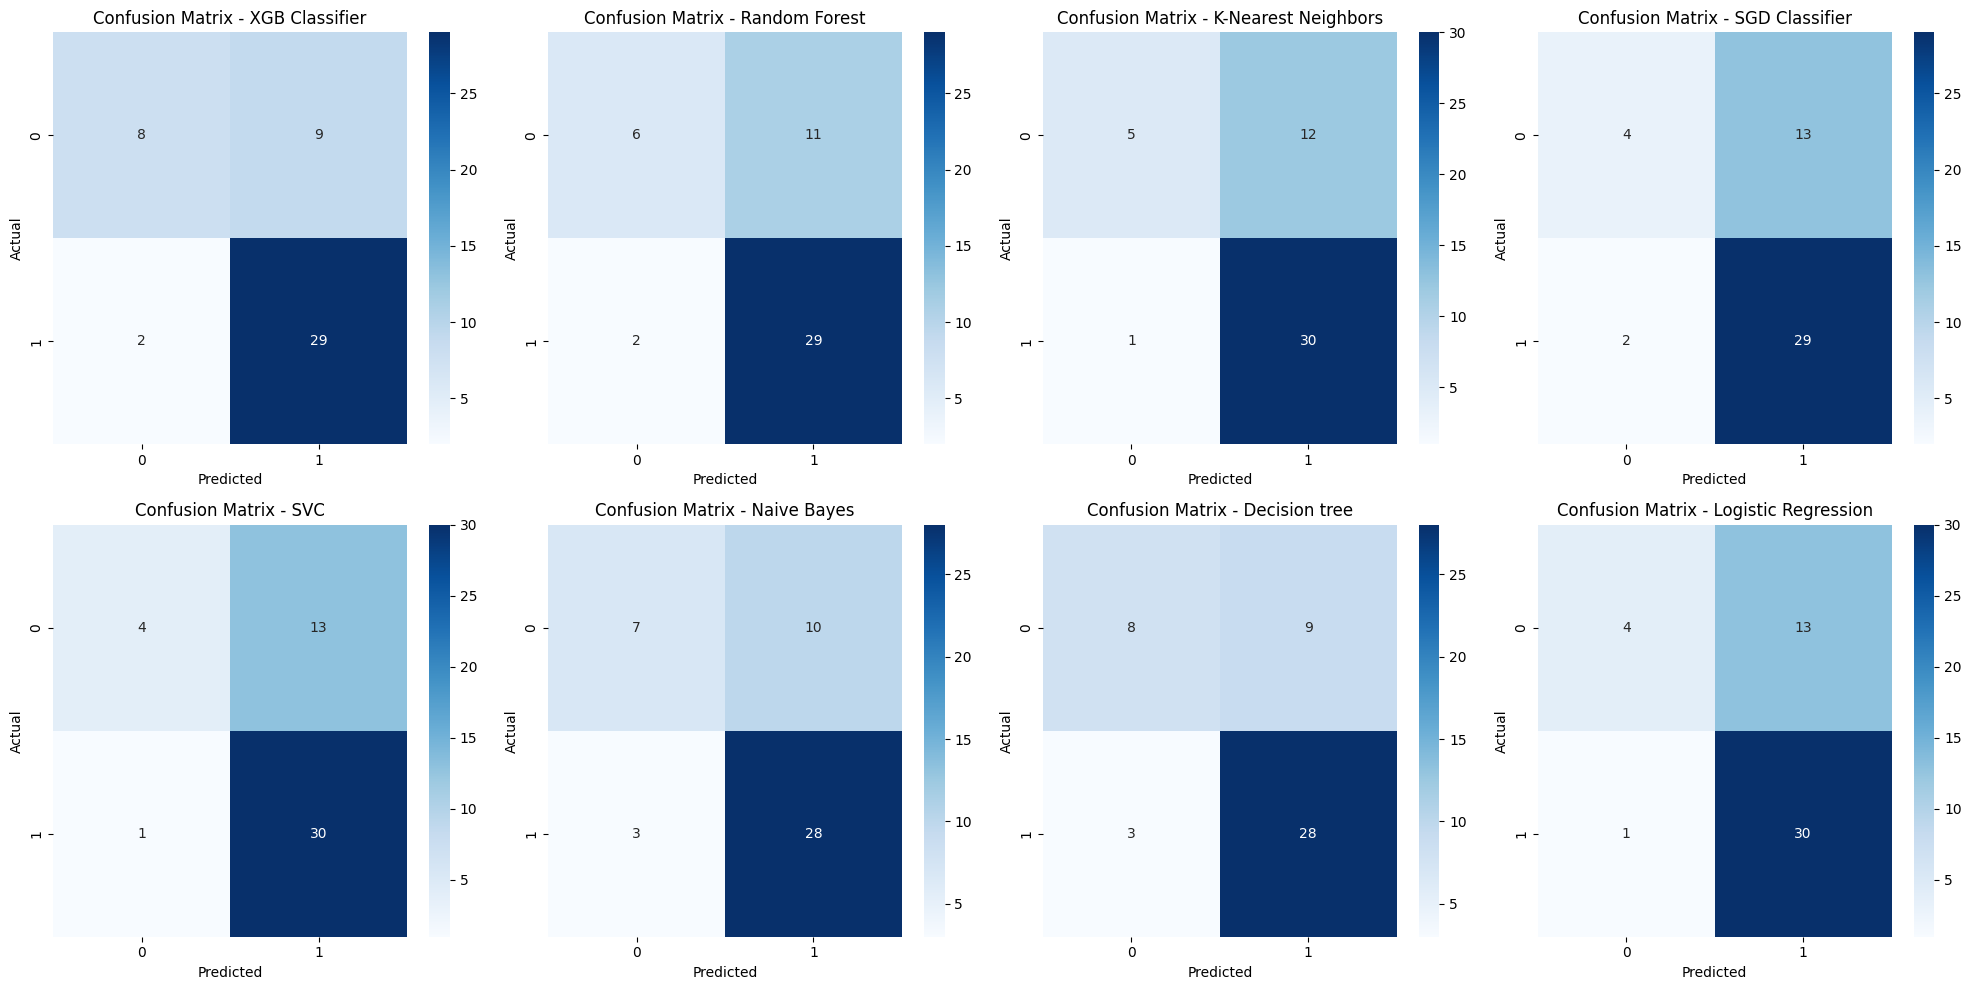

In [24]:
# Initialize dictionaries to store metrics and confusion matrices
metrics_dict = {'Accuracy': {}, 'Precision': {}, 'Recall': {}, 'ROC AUC': {}}
conf_matrices = {}

# Loop through each classifier
for classifier in classifiers:
    model = classifier[0]
    model.fit(x_train, y_train)
    model_name = classifier[1]
    
    # Make predictions
    pred = model.predict(x_test)
    
    # Calculate metrics
    acc = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    roc_auc = roc_auc_score(y_test, pred)
    
    # Store metrics in dictionaries
    metrics_dict['Accuracy'][model_name] = round(acc * 100, 2)
    metrics_dict['Precision'][model_name] = round(precision * 100, 2)
    metrics_dict['Recall'][model_name] = round(recall * 100, 2)
    metrics_dict['ROC AUC'][model_name] = round(roc_auc * 100, 2)
    
    # Calculate confusion matrix
    conf_matrices[model_name] = confusion_matrix(y_test, pred)

# Convert dictionaries to DataFrames
acc_df = pd.DataFrame(metrics_dict['Accuracy'].items(), columns=['Model', 'Accuracy'])
precision_df = pd.DataFrame(metrics_dict['Precision'].items(), columns=['Model', 'Precision'])
recall_df = pd.DataFrame(metrics_dict['Recall'].items(), columns=['Model', 'Recall'])
roc_auc_df = pd.DataFrame(metrics_dict['ROC AUC'].items(), columns=['Model', 'ROC AUC'])

# Merge DataFrames on 'Model' column
combined_df = acc_df.merge(precision_df, on='Model').merge(recall_df, on='Model').merge(roc_auc_df, on='Model')

# Plot confusion matrices
fig, axs = plt.subplots(2, 4, figsize=(20, 10))

# Flatten axs to make it easier to index
axs = axs.flatten()

for i, (model_name, conf_matrix) in enumerate(conf_matrices.items()):
    sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', ax=axs[i])
    axs[i].set_title(f'Confusion Matrix - {model_name}')
    axs[i].set_xlabel('Predicted')
    axs[i].set_ylabel('Actual')

plt.tight_layout()
plt.show()

In [25]:
result = pd.DataFrame(combined_df)
result

,Model,Accuracy,Precision,Recall,ROC AUC
0,XGB Classifier,77.08,76.32,93.55,70.30
1,Random Forest,72.92,72.50,93.55,64.42
2,K-Nearest Neighbors,72.92,71.43,96.77,63.09
3,SGD Classifier,68.75,69.05,93.55,58.54
4,SVC,70.83,69.77,96.77,60.15
5,Naive Bayes,72.92,73.68,90.32,65.75
6,Decision tree,75.00,75.68,90.32,68.69
7,Logistic Regression,70.83,69.77,96.77,60.15


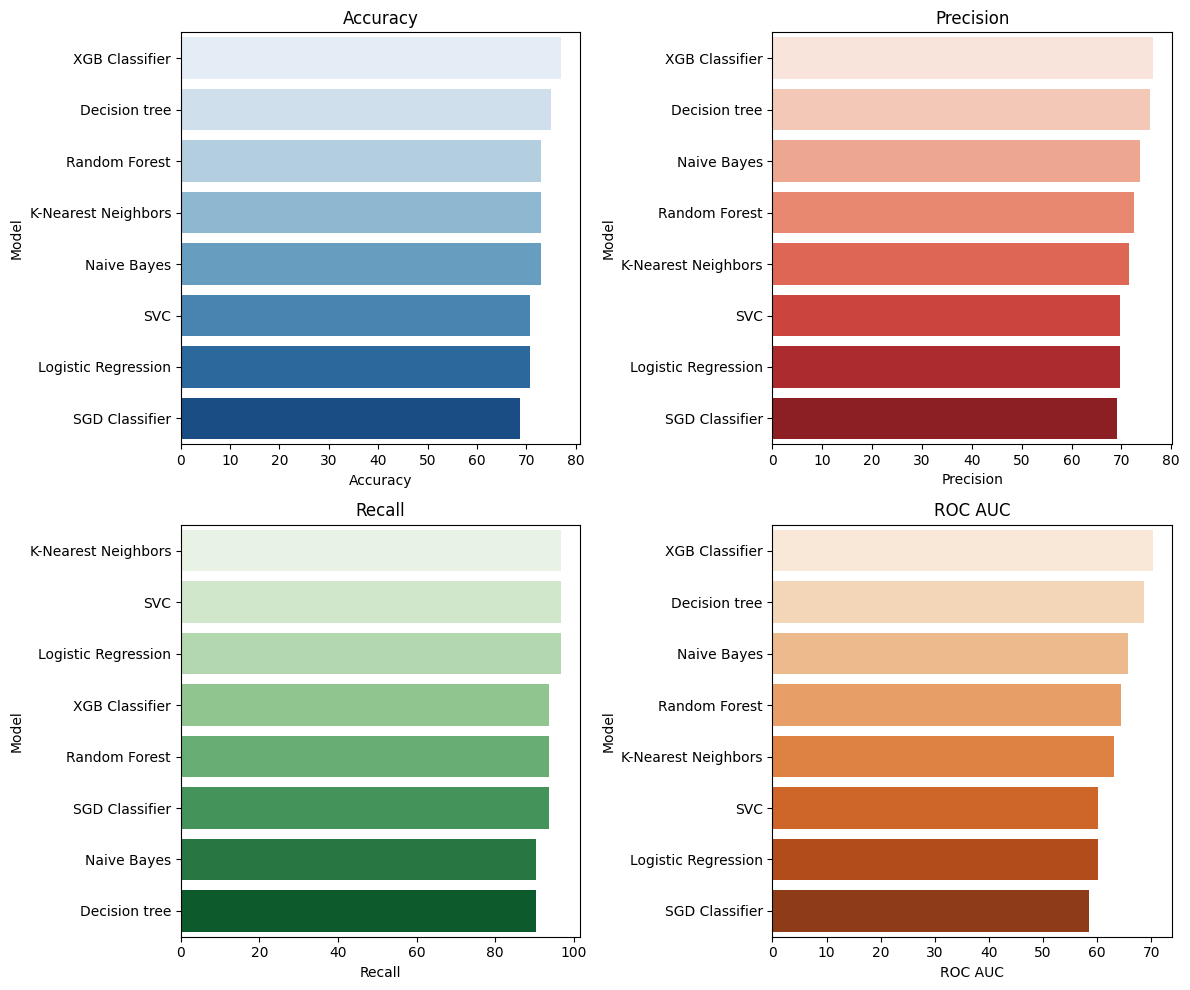

In [26]:
# Plotting chart for each metrics
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

# Plot for Accuracy
sns.barplot(x='Accuracy', y='Model', data=result.sort_values(by='Accuracy', ascending=False), ax=axs[0, 0], palette='Blues')
axs[0, 0].set_title('Accuracy')

# Plot for Precision
sns.barplot(x='Precision', y='Model', data=result.sort_values(by='Precision', ascending=False), ax=axs[0, 1], palette='Reds')
axs[0, 1].set_title('Precision')

# Plot for Recall
sns.barplot(x='Recall', y='Model', data=result.sort_values(by='Recall', ascending=False), ax=axs[1, 0], palette='Greens')
axs[1, 0].set_title('Recall')

# Plot for ROC AUC
sns.barplot(x='ROC AUC', y='Model', data=result.sort_values(by='ROC AUC', ascending=False), ax=axs[1, 1], palette='Oranges')
axs[1, 1].set_title('ROC AUC')

plt.tight_layout()
plt.show()

In [27]:
# Fit a linear regression model on the training set
#instantiate model
xgb = XGBClassifier()

#fit model (training model)
xgb.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [28]:
xgb_pred = xgb.predict(x_test)
#xgb_pred

In [29]:
print("Logistic Regression")
print("Accuracy:", accuracy_score(y_test, xgb_pred))
print("Precision:", precision_score(y_test, xgb_pred))
print("Recall:", recall_score(y_test, xgb_pred))
print("F1-score:", f1_score(y_test, xgb_pred))
print("AUC-ROC:", roc_auc_score(y_test, xgb_pred))

Logistic Regression
Accuracy: 0.7708333333333334
Precision: 0.7631578947368421
Recall: 0.9354838709677419
F1-score: 0.8405797101449276
AUC-ROC: 0.7030360531309299


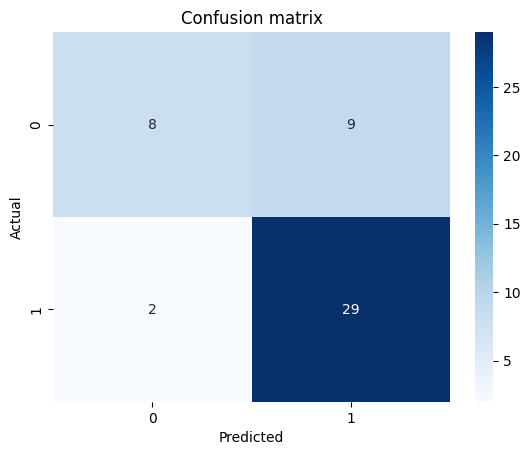

In [30]:
# create a confusion matrix
lcm = confusion_matrix(y_test, xgb_pred)

# visualize the confusion matrix
sns.heatmap(lcm, annot=True, cmap="Blues", fmt="g")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion matrix")
plt.show()

### XGB Classifier is the model best suited for predicting the loan status of applicants